In [151]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from mpl_toolkits.mplot3d import Axes3D

import genboost
import problem
import test

In [152]:
%matplotlib notebook

In [153]:
np.set_printoptions(threshold=np.inf)

In [154]:
# https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html
# Сгенерируем данные для задач классификации

# 3D
features_separate_3D, labels_separate_3D  = make_blobs(
    n_samples=1000, n_features=3, centers=[[1.,1.,1.],[-1.,-1.,-1.]])
labels_separate_3D = list(map(lambda x: 1 if x == 1 else -1,labels_separate_3D))
#features_separate_3D = list(features_separate_3D)

# 2D
features_separate_2D, labels_separate_2D  = make_blobs(
    n_samples=1000, n_features=2, centers=[[1.,1.],[-1.,-1.]])
labels_separate_2D = list(map(lambda x: 1 if x == 1 else -1,labels_separate_2D))
#features_separate_2D = list(features_separate_2D)

# 1D
features_separate_1D, labels_separate_1D  = make_blobs(
    n_samples=1000, n_features=1, centers=[[1.],[-1.]], cluster_std=0.4)
labels_separate_1D = list(map(lambda x: 1 if x == 1 else -1,labels_separate_1D))

In [155]:
features_separate_1D.shape

(1000, 1)

<IPython.core.display.Javascript object>


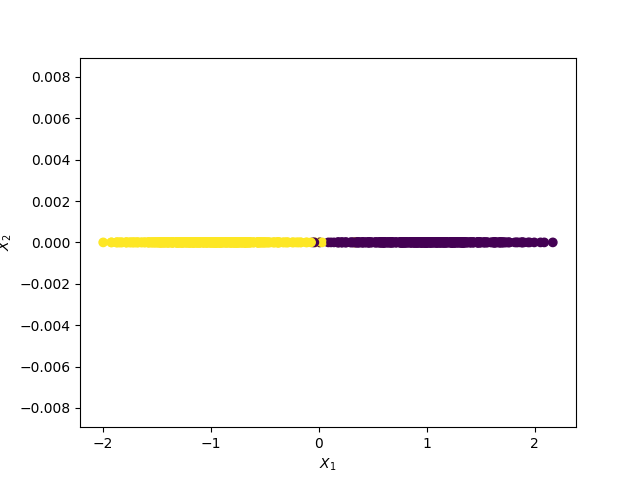

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='$X_1$',ylabel='$X_2$')
ax.scatter(features_separate_1D[:],np.zeros(1000) ,marker='o', c=labels_separate_1D)
#ax.plot([x for x in [0:1000]],)
plt.show()

<IPython.core.display.Javascript object>


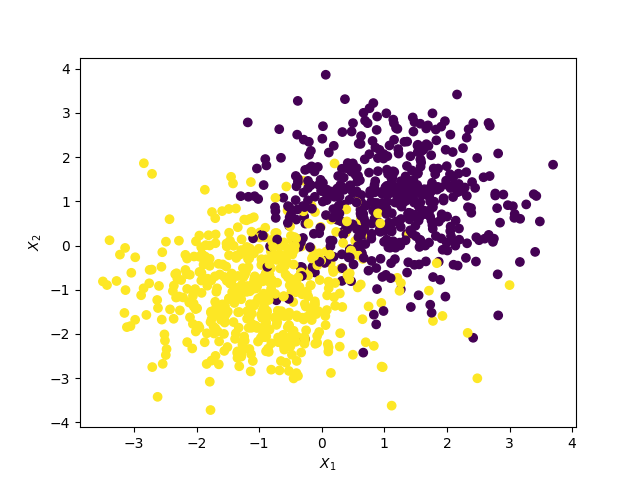

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='$X_1$',ylabel='$X_2$')
ax.scatter(features_separate_2D[:, 0], features_separate_2D[:, 1], marker='o', c=labels_separate_2D)
plt.show()

<IPython.core.display.Javascript object>


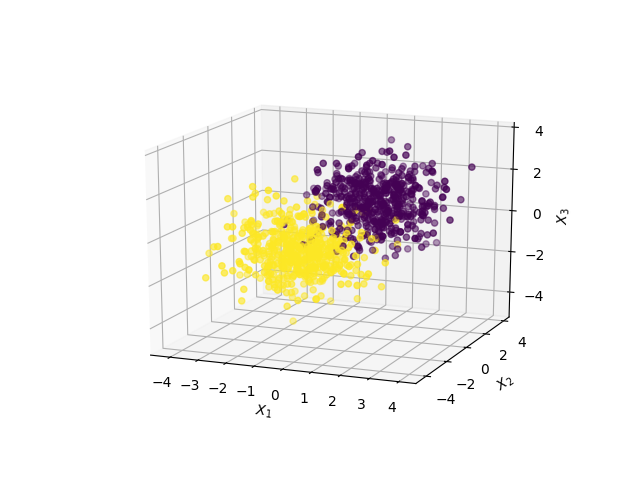

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',xlabel='$X_1$',ylabel='$X_2$',zlabel='$X_3$')
ax.scatter(features_separate_3D[:, 0], features_separate_3D[:, 1],features_separate_3D[:, 2], marker='o', c=labels_separate_3D)
plt.show()

In [45]:
features_separate_1D.shape

(1000, 1)

In [53]:
def hplane(features, weights):
    return np.dot(features, weights[1:]) + weights[0]

def margin(features, labels, weights):
    return labels * hplane(features, weights)

def ayvers_m(features, labels, weights):
    return (margin(features, labels, weights) < 0).astype(int)

def empiric_risk(features, labels, weights):
    return ayvers_m(features, labels, weights).sum()

In [157]:
w0 = np.arange(-1.1, 1.1, 0.001)

In [158]:
Grid_1D_1 = np.array([empiric_risk(features_separate_1D,labels_separate_1D, [x,-1])
                      for x in  w0])
Grid_1D_2 = np.array([empiric_risk(features_separate_1D,labels_separate_1D, [x,1])
                      for x in  w0])

<IPython.core.display.Javascript object>


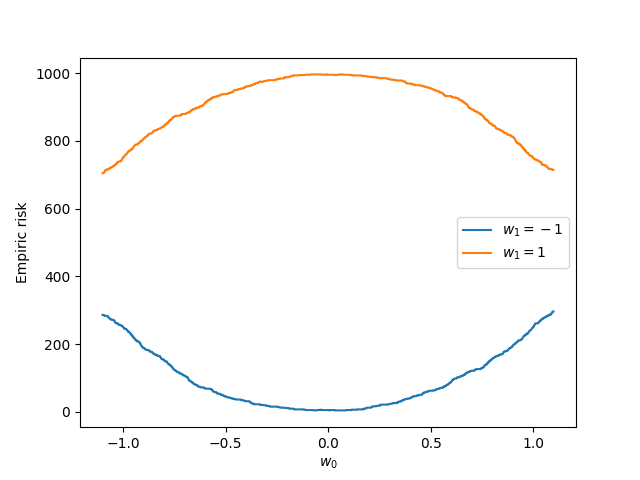

In [160]:
plt.plot(w0, Grid_1D_1, label = "$w_1=-1$")
plt.plot(w0, Grid_1D_2, label = "$w_1=1$")
plt.xlabel("$w_0$")
plt.ylabel('Empiric risk')
plt.legend()

In [129]:
def fitness_1d_minus(weights):
    w1 = -1
    ext_weights = np.append(weights, [w1])
    features = features_separate_1D
    labels = labels_separate_1D
    return [float(empiric_risk(features, labels, ext_weights))]

In [199]:
params = {'algo': 'pso',
         'eta1': 2.05,
         'eta2': 2.05,
         'gen': 200,
         'ind_num': 15,
         'max_vel': 0.5,
         'memory': True,
         'neighb_param': 5,
         'neighb_type': 1,
         'omega': 0.7298,
         'seed': 5679,
         'variant': 5}

In [162]:
prob = problem.problem(fit_func = fitness_1d_minus, dim = 1, lb = -1.1, rb = 1.1)
gb = genboost.genboost(prob)
pop_1d_minus = gb.run(params)
pop_1d_minus.champion_f

array([4.])

In [163]:
min(Grid_1D_1)

4

In [164]:
pop_1d.champion_x

array([-0.03296343])

In [165]:
points = np.array([-1,1])

<IPython.core.display.Javascript object>


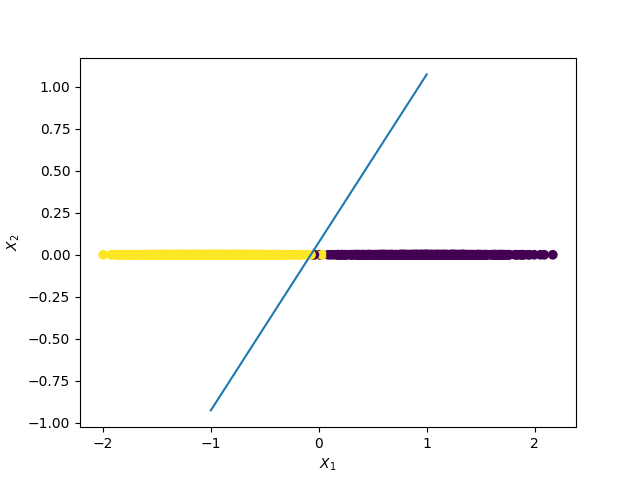

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='$X_1$',ylabel='$X_2$')
ax.scatter(features_separate_1D[:],np.zeros(1000) ,marker='o', c=labels_separate_1D)
ax.plot( points, pop_1d_minus.champion_x+points)
plt.show()

In [167]:
def fitness_1d_plus(weights):
    w1 = 1
    ext_weights = np.append(weights, [w1])
    features = features_separate_1D
    labels = labels_separate_1D
    return [-1*float(empiric_risk(features, labels, ext_weights))]

In [168]:
prob = problem.problem(fit_func = fitness_1d_plus, dim = 1, lb = -1.1, rb = 1.1)
gb = genboost.genboost(prob)
pop_1d_plus = gb.run(params)
pop_1d_plus.champion_f

array([-996.])

<IPython.core.display.Javascript object>


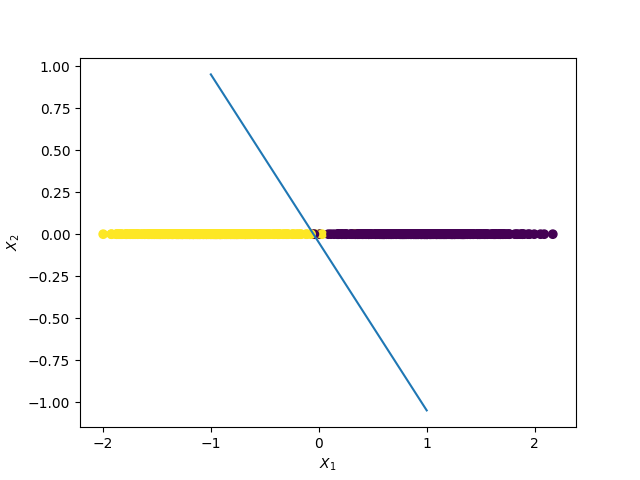

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='$X_1$',ylabel='$X_2$')
ax.scatter(features_separate_1D[:],np.zeros(1000) ,marker='o', c=labels_separate_1D)
ax.plot(points, pop_1d_plus.champion_x-points)
plt.show()

In [173]:
def fitness_2d(weights):
    features = features_separate_2D
    labels = labels_separate_2D
    return [float(empiric_risk(features, labels, weights))]

In [186]:
prob = problem.problem(fit_func = fitness_2d, dim = 3, lb = -10., rb = 10.)
gb = genboost.genboost(prob)
pop_2d = gb.run(params)
pop_2d.champion_f

array([55.])

In [187]:
def line(x, c, a, b,):
    return (-c-a*x)/b

In [188]:
pop_2d.champion_x

array([ -1.23391359,  -7.19359582, -10.        ])

<IPython.core.display.Javascript object>


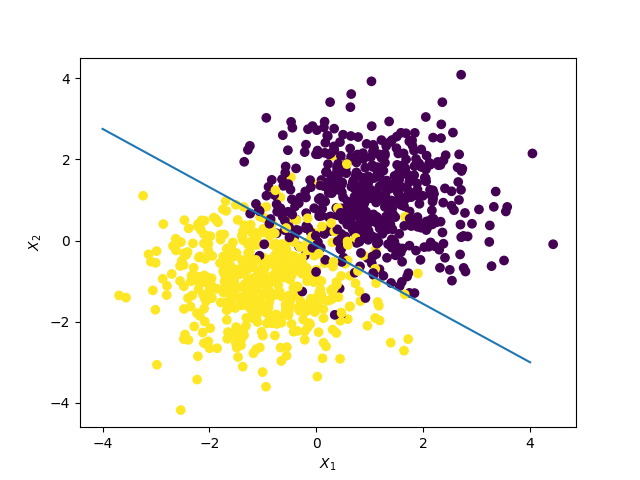

In [189]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='$X_1$',ylabel='$X_2$')
ax.scatter(features_separate_2D[:, 0], features_separate_2D[:, 1], marker='o', c=labels_separate_2D)
ax.plot(points*4, line(points*4, *pop_2d.champion_x))
plt.show()

In [190]:
def fitness_3d(weights):
    features = features_separate_3D
    labels = labels_separate_3D
    return [float(empiric_risk(features, labels, weights))]

In [192]:
prob = problem.problem(fit_func = fitness_3d, dim = 4, lb = -10., rb = 10.)
gb = genboost.genboost(prob)
pop_3d = gb.run(params)
pop_3d.champion_f

array([34.])

In [200]:
pop_3d.champion_x

array([-0.40837227, -6.85452514, -9.976117  , -7.0997859 ])

In [193]:
def plane(x, y, d, a, b, c):
    return (-d-a*x-b*y)/c

In [194]:
P1, P2 = np.meshgrid(np.linspace(-4,4,3), np.linspace(-4,4,3))

In [195]:
P3 = plane(P1, P2, *pop_3d.champion_x)

<IPython.core.display.Javascript object>


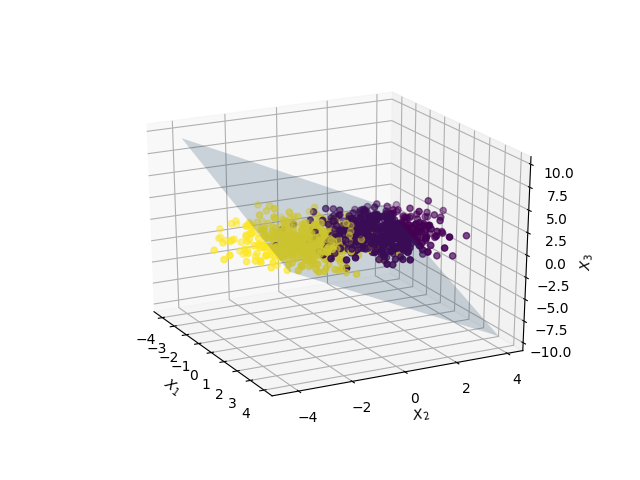

In [198]:
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(P1, P2, P3, alpha=0.2)
ax = plt.gca()
ax.scatter(features_separate_3D[:, 0], features_separate_3D[:, 1],features_separate_3D[:, 2], marker='o', c=labels_separate_3D)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$X_3$')
plt.show()